## Mini Project III

In [2]:
import pandas as pd
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib

# Question 1: Wrangle, clean, visualize, and k-means clusters

In [3]:
df_customer = pd.read_csv('twm_customer.csv', delimiter=';')

In [4]:
df_customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [5]:
# No missing values
df_customer.isna().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [6]:
# 1 = single, 2 = married, 3 = widowed, 4 = divorced
df_customer.marital_status.unique()

array([2, 1, 4, 3], dtype=int64)

### Drop unnecessary columns

In [7]:
# Drop columns
df_customer.drop(['cust_id', 'name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name','postal_code', 'city_name', 'state_code'],axis=1, inplace=True)

In [9]:
# Get stats on numericls columns
df_customer.describe()


,income,age,years_with_bank,nbr_children,marital_status
count,747.000000,747.000000,747.000000,747.000000,747.000000
mean,22728.281124,42.479250,3.907631,0.714859,1.882195
std,22207.221405,19.114879,2.675634,1.103410,0.892051
min,0.000000,13.000000,0.000000,0.000000,1.000000
25%,7118.500000,28.000000,2.000000,0.000000,1.000000
50%,17242.000000,42.000000,4.000000,0.000000,2.000000
75%,31338.000000,56.000000,6.000000,1.000000,2.000000
max,144157.000000,89.000000,9.000000,5.000000,4.000000


In [10]:
df_customer.dtypes

income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status      int64
dtype: object

### Remove young people and those with $0 income

In [11]:
# Remove young people and those with $0 income
age_income_filter = (df_customer.income > 0) & (df_customer.age > 17)
df_customer = df_customer.loc[age_income_filter]

In [523]:
len(df_customer)

645

In [12]:
df_customer.describe()

,income,age,years_with_bank,nbr_children,marital_status
count,645.000000,645.000000,645.000000,645.000000,645.000000
mean,26322.520930,46.800000,3.972093,0.827907,2.021705
std,21829.191959,16.912783,2.689264,1.147437,0.882627
min,1039.000000,18.000000,0.000000,0.000000,1.000000
25%,10818.000000,34.000000,2.000000,0.000000,1.000000
50%,20184.000000,46.000000,4.000000,0.000000,2.000000
75%,35237.000000,58.000000,6.000000,2.000000,2.000000
max,144157.000000,89.000000,9.000000,5.000000,4.000000


### Encode the gender feature

In [13]:
# strip the spaces in the gender column
df_customer.gender = df_customer.gender.str.strip()

# Convert gender to numerical
df_customer.replace({"gender": 
                             {"F" : 0, "M" : 1}}, inplace=True)

In [14]:
df_customer.head()

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,1,2
1,6605,71,1,0,1,2
2,18548,38,8,0,0,1
3,47668,54,3,0,0,1
4,44554,59,9,2,0,4


### Scale the data

In [15]:
scaled_df = df_customer.copy()

In [16]:
from sklearn.preprocessing import StandardScaler

num_feats = df_customer.dtypes[df_customer.dtypes != 'object'].index.tolist()
x = scaled_df.loc[:, num_feats].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [17]:
df_standard = pd.DataFrame(x,columns=num_feats)
df_standard.tail()

,income,age,years_with_bank,nbr_children,gender,marital_status
640,-0.528488,-0.639066,0.754660,0.150097,-0.886963,2.243109
641,0.002956,0.544389,0.754660,0.150097,1.127443,-0.024611
642,1.603569,0.189353,-1.478165,1.022281,1.127443,-0.024611
643,-0.514505,-0.579893,1.126798,-0.722087,-0.886963,-0.024611
644,-0.387283,-1.704176,-0.361752,-0.722087,-0.886963,-1.158471


## Variable Selection

In [ ]:
df_select = df_standard.copy()

In [532]:
# Setup target variable 

y = df_select.income
df_select.drop('income', axis=1, inplace=True)

In [533]:
# Remove features with low variance

from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.1)
df_transformed = vt.fit_transform(df_select)

# lost column names here

In [534]:
print(f'new num cols: {df_transformed.shape[1]}', f' old num cols: {df_select.shape[1]}')

new num cols: 5  old num cols: 5


In [535]:
selected_columns = df_select.columns[vt.get_support()]
# transforming an array back to a data-frame preserves column labels
df_transformed = pd.DataFrame(df_transformed, columns = selected_columns)

In [536]:
# step 1
df_corr = df_transformed.corr().abs()

# step 2
indices = np.where(df_corr > 0.8) 
indices = [(df_corr.index[x], df_corr.columns[y]) 
    for x, y in zip(*indices)
        if x != y and x < y]

# step 3
for idx in indices: #each pair
    try:
        df_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

In [537]:
print(indices)

[]


In [538]:
df_transformed.shape

(645, 5)

In [539]:
# Forward Regression

from sklearn.feature_selection import f_regression, SelectKBest
skb = SelectKBest(f_regression, k='all')
X = skb.fit_transform(df_transformed, y)

In [540]:
# Convert X back to data frame

skb.get_support()
# column names
columns = df_transformed.columns[skb.get_support()]
X = pd.DataFrame(X,columns=columns)

In [541]:
X.dtypes

age                float64
years_with_bank    float64
nbr_children       float64
gender             float64
marital_status     float64
dtype: object

## BASIC PLOTS

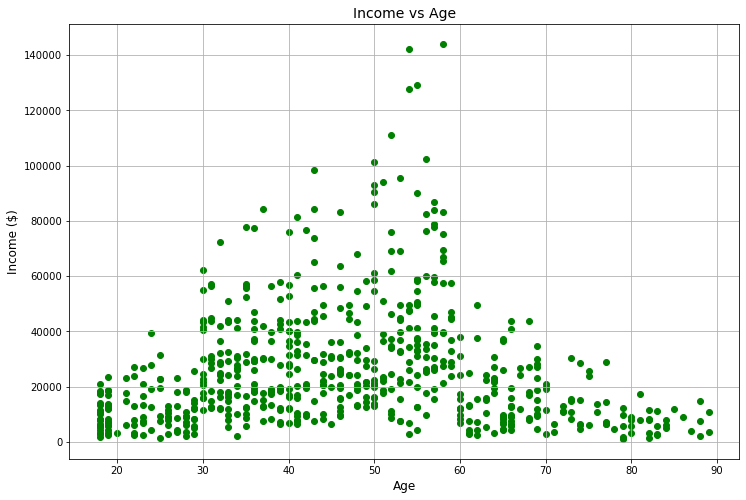

In [299]:
# Income and Age

# set figure size
plt.rcParams["figure.figsize"] = (12,8)


# plot clusters
plt.scatter(df_customer['age'],
            df_customer['income'],
            c='green',
            marker='o')

plt.title('Income vs Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income ($)', fontsize=12)

plt.grid()
plt.show()

# normally distributed

In [223]:
df_customer

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,1,2
1,6605,71,1,0,1,2
2,18548,38,8,0,0,1
3,47668,54,3,0,0,1
4,44554,59,9,2,0,4
...,...,...,...,...,...,...
742,14795,36,6,1,0,4
743,26387,56,6,1,1,2
744,61300,50,0,2,1,2
745,15100,37,7,0,0,2


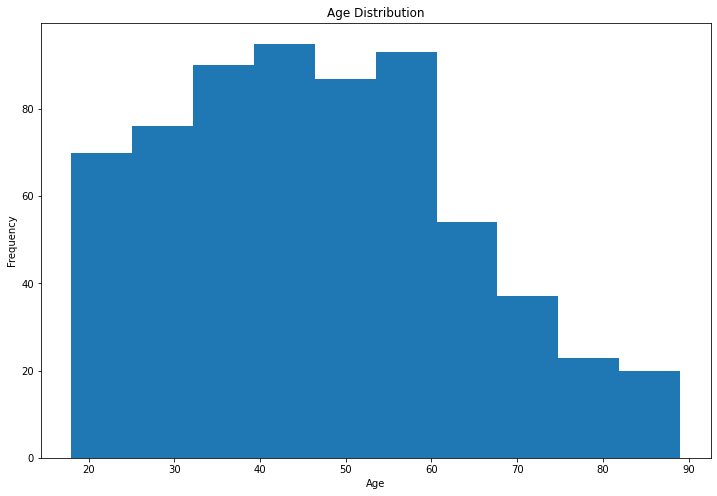

In [231]:
plt.hist(df_customer.age, bins=10)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [313]:
age_hist

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,1,2
1,6605,71,1,0,1,2
2,18548,38,8,0,0,1
3,47668,54,3,0,0,1
4,44554,59,9,2,0,4
...,...,...,...,...,...,...
742,14795,36,6,1,0,4
743,26387,56,6,1,1,2
744,61300,50,0,2,1,2
745,15100,37,7,0,0,2


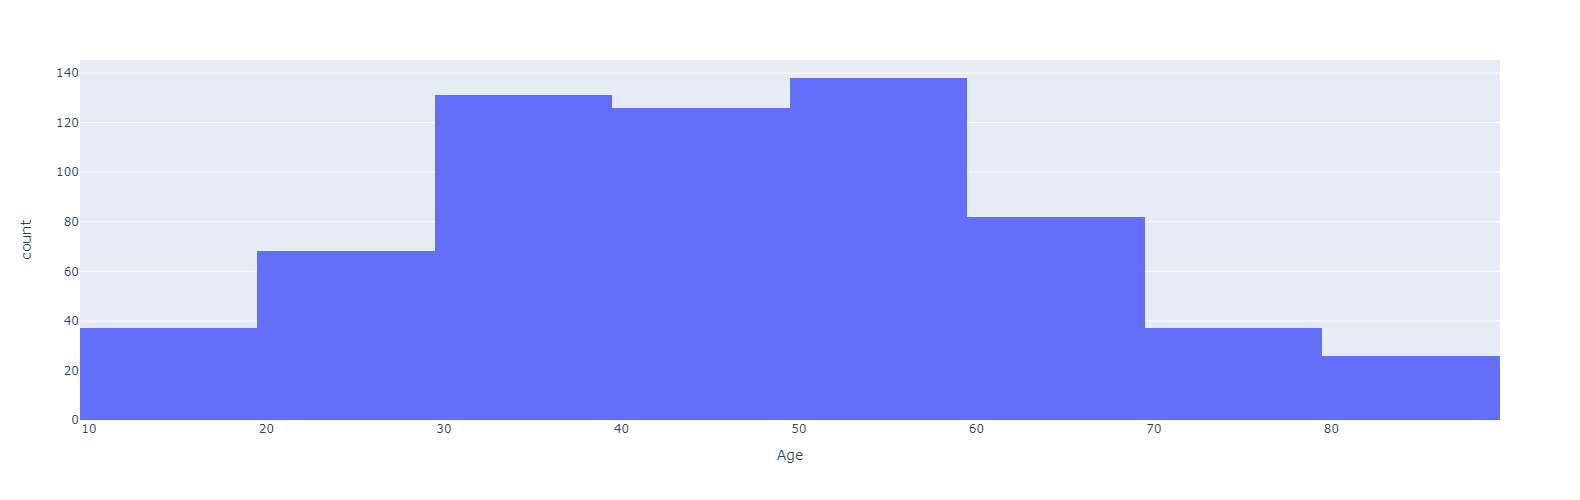

In [320]:
age_hist=df_customer.copy()
age_hist.rename(columns = {'age': 'Age'}, inplace=True)

fig = px.histogram(age_hist.Age,
                   x="Age",
                  width=600,
                  height=500,
                  nbins=10)
fig.show()

In [279]:
df_gender_income_mean

,gender,income
0,0,22965.520776
1,1,30589.693662


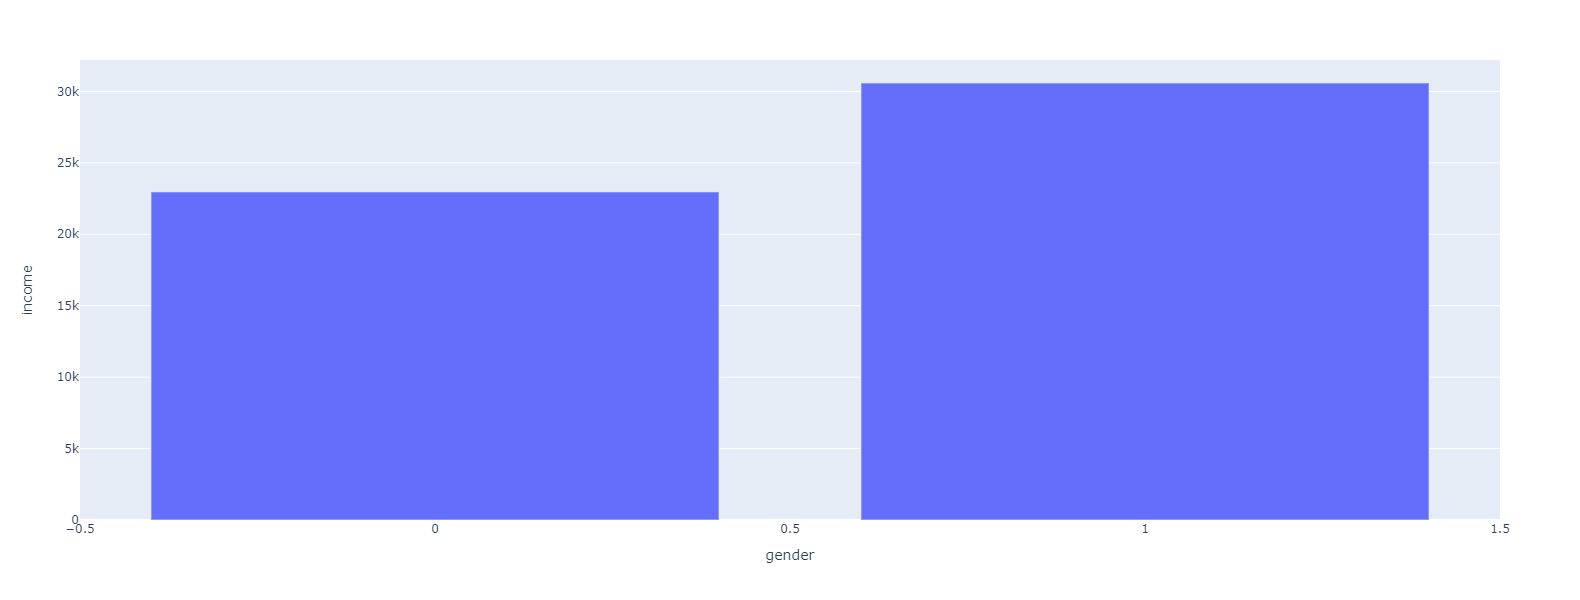

In [321]:
df_gender_income_mean = df_customer.groupby('gender')['income'].mean().reset_index()

labels = ['Female', 'Male']

fig = px.bar(df_gender_income_mean,
             x='gender',
             y='income',
             width=1000,
            height=600,
            labels=labels)
fig.show()

In [284]:
df_gender_income_count

,gender,income
0,0,361
1,1,284


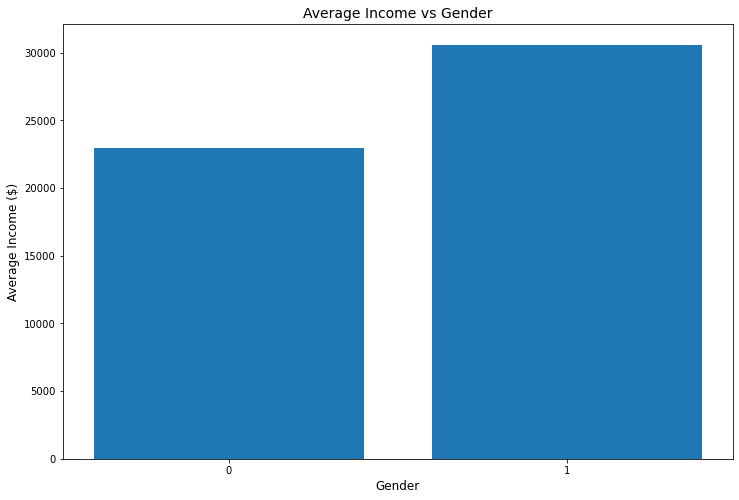

In [323]:
df_gender_income_count = df_customer.groupby('gender')['income'].count().reset_index()

plt.bar(df_gender_income_mean.gender, df_gender_income_mean.income)

plt.title('Average Income vs Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Income ($)', fontsize=12)
plt.xticks(ticks=[0, 1], label=['Female', 'Male'])
plt.show()

### Plot Distortion

In [332]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

In [334]:
# Check elbow rule based on original data
X = df_customer[['income', 'age']]

# Go wih 4 clusters

In [68]:
# Check elbow rule based on standard data
X = df_standard

In [24]:
X

,income,age,years_with_bank,nbr_children,gender,marital_status
0,-0.007909,-0.047338,0.382523,0.150097,1.127443,-0.024611
1,-0.903965,1.431981,-1.106028,-0.722087,1.127443,-0.024611
2,-0.356429,-0.520720,1.498936,-0.722087,-0.886963,-1.158471
3,0.978600,0.426044,-0.361752,-0.722087,-0.886963,-1.158471
4,0.835836,0.721908,1.871073,1.022281,-0.886963,2.243109
...,...,...,...,...,...,...
640,-0.528488,-0.639066,0.754660,0.150097,-0.886963,2.243109
641,0.002956,0.544389,0.754660,0.150097,1.127443,-0.024611
642,1.603569,0.189353,-1.478165,1.022281,1.127443,-0.024611
643,-0.514505,-0.579893,1.126798,-0.722087,-0.886963,-0.024611


C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



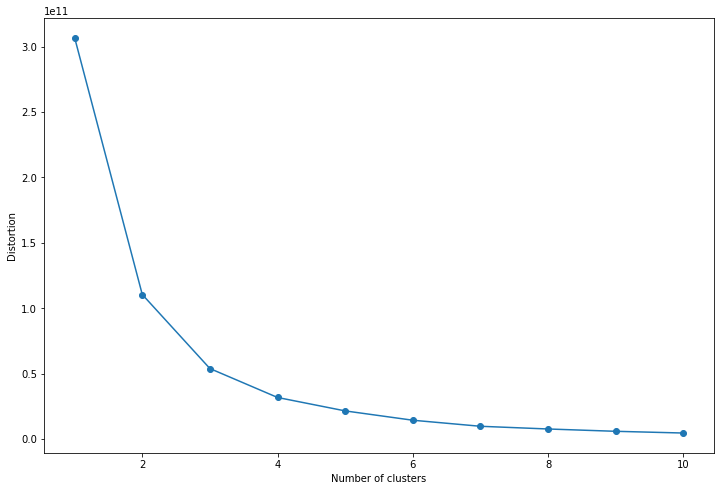

In [335]:
# elbow rule
plot_distortion(X,max_clusters=10)

### Plot Clusters

In [379]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,1]
        y = X[y_res == cluster,0]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [44]:
df_customer.head()

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,1,2
1,6605,71,1,0,1,2
2,18548,38,8,0,0,1
3,47668,54,3,0,0,1
4,44554,59,9,2,0,4


In [206]:
df_standard

,income,age,years_with_bank,nbr_children,gender,marital_status
0,-0.007909,-0.047338,0.382523,0.150097,1.127443,-0.024611
1,-0.903965,1.431981,-1.106028,-0.722087,1.127443,-0.024611
2,-0.356429,-0.520720,1.498936,-0.722087,-0.886963,-1.158471
3,0.978600,0.426044,-0.361752,-0.722087,-0.886963,-1.158471
4,0.835836,0.721908,1.871073,1.022281,-0.886963,2.243109
...,...,...,...,...,...,...
640,-0.528488,-0.639066,0.754660,0.150097,-0.886963,2.243109
641,0.002956,0.544389,0.754660,0.150097,1.127443,-0.024611
642,1.603569,0.189353,-1.478165,1.022281,1.127443,-0.024611
643,-0.514505,-0.579893,1.126798,-0.722087,-0.886963,-0.024611


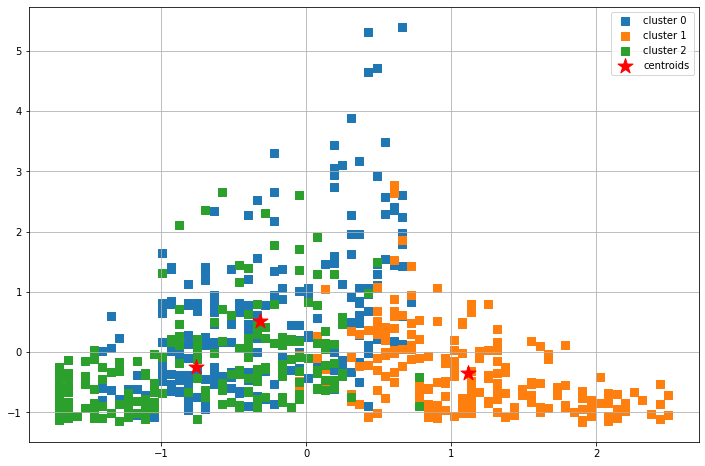

In [380]:
# Cluster using standard data

X_standard = df_standard.to_numpy()

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

y_km = km.fit_predict(X_standard)

plot_clusters(X_standard, y_km, plt_cluster_centers= True)

In [326]:
df_standard

,income,age,years_with_bank,nbr_children,gender,marital_status
0,-0.007909,-0.047338,0.382523,0.150097,1.127443,-0.024611
1,-0.903965,1.431981,-1.106028,-0.722087,1.127443,-0.024611
2,-0.356429,-0.520720,1.498936,-0.722087,-0.886963,-1.158471
3,0.978600,0.426044,-0.361752,-0.722087,-0.886963,-1.158471
4,0.835836,0.721908,1.871073,1.022281,-0.886963,2.243109
...,...,...,...,...,...,...
640,-0.528488,-0.639066,0.754660,0.150097,-0.886963,2.243109
641,0.002956,0.544389,0.754660,0.150097,1.127443,-0.024611
642,1.603569,0.189353,-1.478165,1.022281,1.127443,-0.024611
643,-0.514505,-0.579893,1.126798,-0.722087,-0.886963,-0.024611


In [329]:
df_standard[['income', 'age']]

,income,age
0,-0.007909,-0.047338
1,-0.903965,1.431981
2,-0.356429,-0.520720
3,0.978600,0.426044
4,0.835836,0.721908
...,...,...
640,-0.528488,-0.639066
641,0.002956,0.544389
642,1.603569,0.189353
643,-0.514505,-0.579893


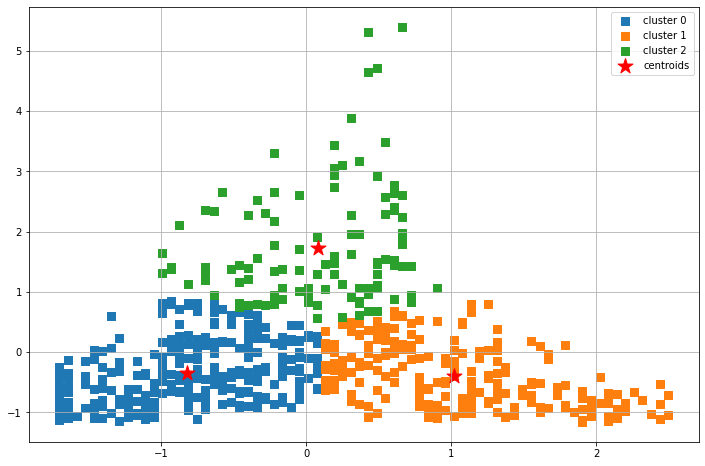

AttributeError: module 'matplotlib.pyplot' has no attribute 'ticks'

In [367]:
# Cluster using standard data

X_standard = df_standard[['income', 'age']].to_numpy()

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

y_km = km.fit_predict(X_standard)

plot_clusters(X_standard, y_km, plt_cluster_centers= True)

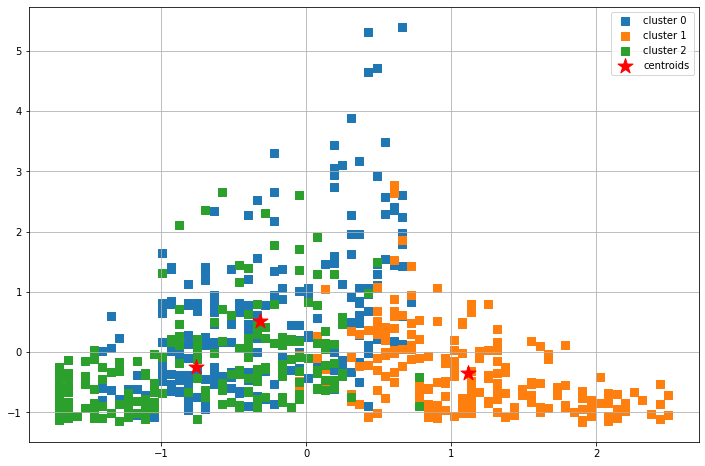

In [355]:
# Cluster using standard data

X_standard = df_standard.iloc[:, :].to_numpy()

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

y_km = km.fit_predict(X_standard)

plot_clusters(X_standard, y_km, plt_cluster_centers= True)

# Question 2
### Visualize using radar charts

In [690]:
df_standard.columns.values

array(['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status'], dtype=object)

In [668]:
scaled_df = df_customer.copy()

In [168]:
df_customer

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,1,2
1,6605,71,1,0,1,2
2,18548,38,8,0,0,1
3,47668,54,3,0,0,1
4,44554,59,9,2,0,4
...,...,...,...,...,...,...
742,14795,36,6,1,0,4
743,26387,56,6,1,1,2
744,61300,50,0,2,1,2
745,15100,37,7,0,0,2


In [200]:
from sklearn.preprocessing import StandardScaler

num_feats = df_customer.dtypes[df_customer.dtypes != 'object'].index.tolist()
x = scaled_df.loc[:, num_feats].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [364]:
from sklearn.preprocessing import StandardScaler

num_feats = df_customer.dtypes[df_customer.dtypes != 'object'].index.tolist()
x = scaled_df.iloc[:, 1:].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [696]:
clusters

,income,age,years_with_bank,nbr_children,gender,marital_status,label
0,-0.007909,-0.047338,0.382523,0.150097,1.127443,-0.024611,1
1,-0.903965,1.431981,-1.106028,-0.722087,1.127443,-0.024611,1
2,-0.356429,-0.520720,1.498936,-0.722087,-0.886963,-1.158471,0
3,0.978600,0.426044,-0.361752,-0.722087,-0.886963,-1.158471,0
4,0.835836,0.721908,1.871073,1.022281,-0.886963,2.243109,2
...,...,...,...,...,...,...,...
640,-0.528488,-0.639066,0.754660,0.150097,-0.886963,2.243109,2
641,0.002956,0.544389,0.754660,0.150097,1.127443,-0.024611,1
642,1.603569,0.189353,-1.478165,1.022281,1.127443,-0.024611,3
643,-0.514505,-0.579893,1.126798,-0.722087,-0.886963,-0.024611,0


In [54]:
km.labels_

array([1, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 3, 0, 2, 1,
       0, 0, 1, 1, 1, 3, 2, 3, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2,
       2, 3, 1, 0, 1, 3, 1, 3, 0, 2, 0, 1, 3, 0, 0, 2, 0, 0, 2, 1, 1, 1,
       0, 0, 1, 0, 3, 1, 0, 1, 2, 1, 1, 0, 3, 2, 0, 0, 0, 1, 2, 1, 1, 2,
       1, 2, 1, 3, 1, 3, 0, 0, 1, 1, 0, 2, 2, 2, 1, 3, 2, 3, 2, 1, 2, 1,
       0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 3, 3, 3, 2, 0, 1, 1, 1, 1, 2, 0,
       1, 1, 3, 1, 1, 2, 1, 2, 3, 2, 3, 0, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 2, 3, 1, 1, 0, 0, 3, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 3, 3, 0, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 0, 0, 0, 3, 3, 0, 1, 2, 0, 1, 0, 0, 2, 3, 0, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2,
       1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 3, 1, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 2, 2, 1, 3, 1, 2, 0, 2, 0, 0, 2, 2, 1, 3, 2, 2, 1, 3,
       1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 3, 0, 2, 1, 1,

### Radar Chart for everything

In [363]:
x[:, 1:]

array([[-0.04733821,  0.38252282,  0.15009679],
       [ 1.43198084, -1.10602752, -0.72208725],
       [-0.52072031,  1.49893557, -0.72208725],
       ...,
       [ 0.18935284, -1.4781651 ,  1.02228083],
       [-0.57989307,  1.12679799, -0.72208725],
       [-1.70417555, -0.36175235, -0.72208725]])

In [358]:
df_customer.columns.values[1:]

array(['age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status'], dtype=object)

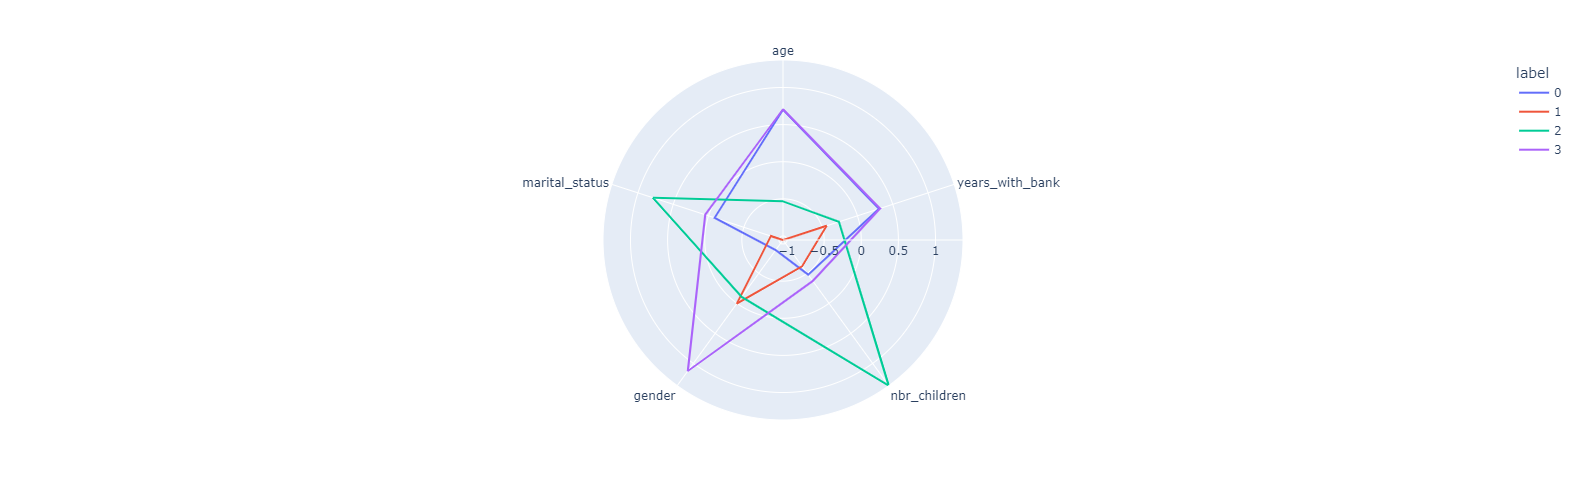

In [365]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# Get the fit 
km.fit(x)

# Obtain clusters and classify
clusters = pd.DataFrame(x, columns=df_customer.columns.values[1:])
clusters['label'] = km.labels_

# Group clusters for radar chart
polar = clusters.groupby('label').mean().reset_index()
polar = pd.melt(polar, id_vars=['label'])

#
#labels = 

# Plot the figure
fig2 = px.line_polar(polar, r='value', theta='variable', color='label', line_close=True, height=500, width=1000)
fig2.show()

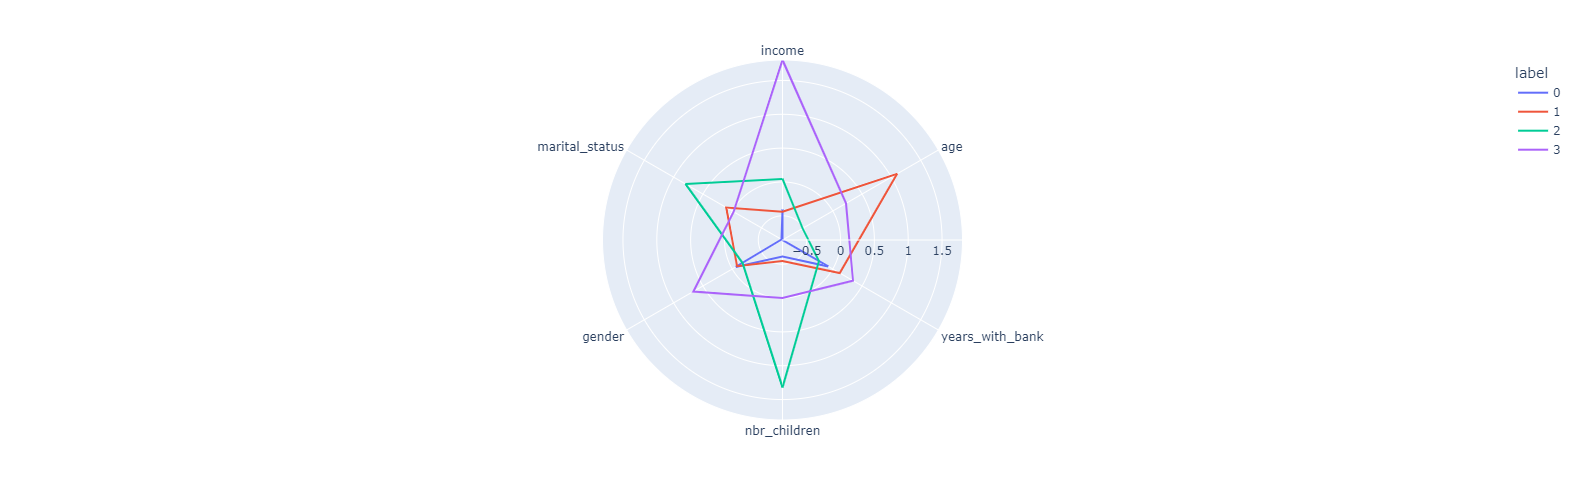

In [201]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# Get the fit 
km.fit(x)

# Obtain clusters and classify
clusters = pd.DataFrame(x, columns=df_customer.columns.values)
clusters['label'] = km.labels_

# Group clusters for radar chart
polar = clusters.groupby('label').mean().reset_index()
polar = pd.melt(polar, id_vars=['label'])

#
#labels = 

# Plot the figure
fig2 = px.line_polar(polar, r='value', theta='variable', color='label', line_close=True, height=500, width=1000)
fig2.show()

### Radar chart for income, age, nbr_children

In [336]:
df_customer.columns.values[0:4]

array(['income', 'age', 'years_with_bank', 'nbr_children'], dtype=object)

In [181]:
x

array([[-0.00790935, -0.04733821,  0.38252282,  0.15009679,  1.12744258,
        -0.02461092],
       [-0.90396491,  1.43198084, -1.10602752, -0.72208725,  1.12744258,
        -0.02461092],
       [-0.35642889, -0.52072031,  1.49893557, -0.72208725, -0.88696313,
        -1.15847105],
       ...,
       [ 1.60356943,  0.18935284, -1.4781651 ,  1.02228083,  1.12744258,
        -0.02461092],
       [-0.5145051 , -0.57989307,  1.12679799, -0.72208725, -0.88696313,
        -0.02461092],
       [-0.38728309, -1.70417555, -0.36175235, -0.72208725, -0.88696313,
        -1.15847105]])

In [337]:
from sklearn.preprocessing import StandardScaler

x = df_customer.iloc[:,0:4].values
x = StandardScaler().fit_transform(x) # normalizing the features

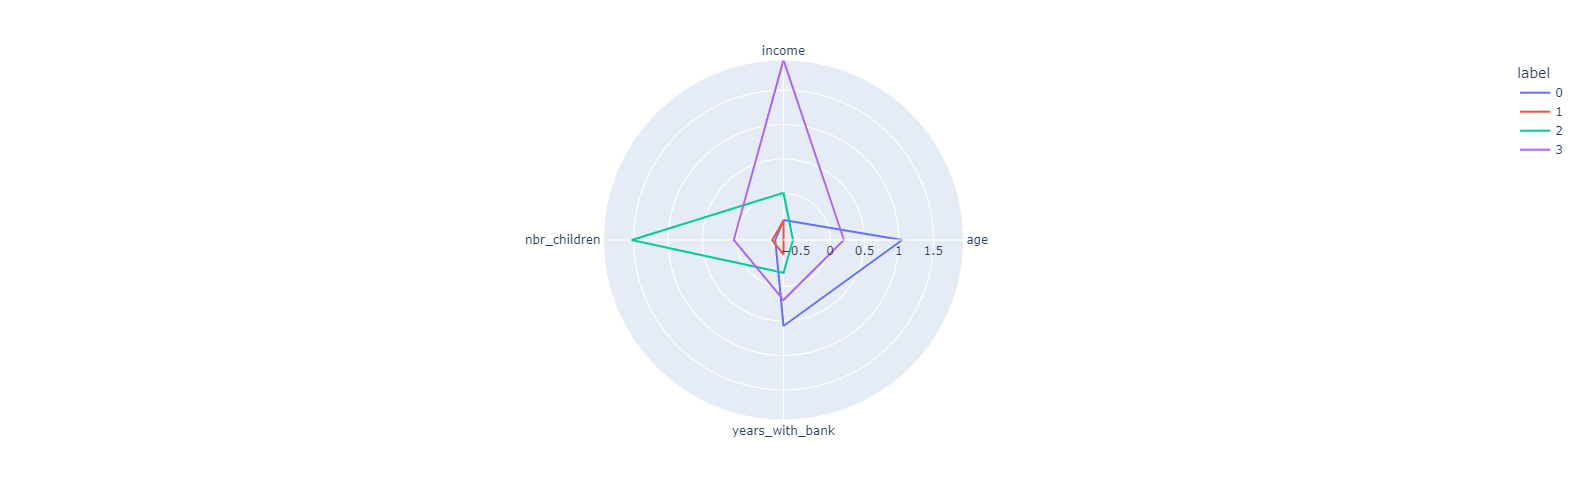

In [338]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# Get the fit 
km.fit(x)

# Obtain clusters and classify
clusters = pd.DataFrame(x, columns=df_customer.columns.values[0:4])
clusters['label'] = km.labels_

# Group clusters for radar chart
polar = clusters.groupby('label').mean().reset_index()
polar = pd.melt(polar, id_vars=['label'])

#
#labels = 

# Plot the figure
fig2 = px.line_polar(polar, r='value', theta='variable', color='label', line_close=True, height=500, width=1000)
fig2.show()

## Group by Label and look for relationships

In [214]:
df_standard

,income,age,years_with_bank,nbr_children,gender,marital_status
0,-0.007909,-0.047338,0.382523,0.150097,1.127443,-0.024611
1,-0.903965,1.431981,-1.106028,-0.722087,1.127443,-0.024611
2,-0.356429,-0.520720,1.498936,-0.722087,-0.886963,-1.158471
3,0.978600,0.426044,-0.361752,-0.722087,-0.886963,-1.158471
4,0.835836,0.721908,1.871073,1.022281,-0.886963,2.243109
...,...,...,...,...,...,...
640,-0.528488,-0.639066,0.754660,0.150097,-0.886963,2.243109
641,0.002956,0.544389,0.754660,0.150097,1.127443,-0.024611
642,1.603569,0.189353,-1.478165,1.022281,1.127443,-0.024611
643,-0.514505,-0.579893,1.126798,-0.722087,-0.886963,-0.024611


In [216]:
features = df_standard.columns.values
features

array(['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status'], dtype=object)

In [211]:
df_clusters = clusters.copy()

In [212]:
df_clusters.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,label
0,-0.007909,-0.047338,0.382523,0.150097,1.127443,-0.024611,1
1,-0.903965,1.431981,-1.106028,-0.722087,1.127443,-0.024611,1
2,-0.356429,-0.520720,1.498936,-0.722087,-0.886963,-1.158471,0
3,0.978600,0.426044,-0.361752,-0.722087,-0.886963,-1.158471,0
4,0.835836,0.721908,1.871073,1.022281,-0.886963,2.243109,2


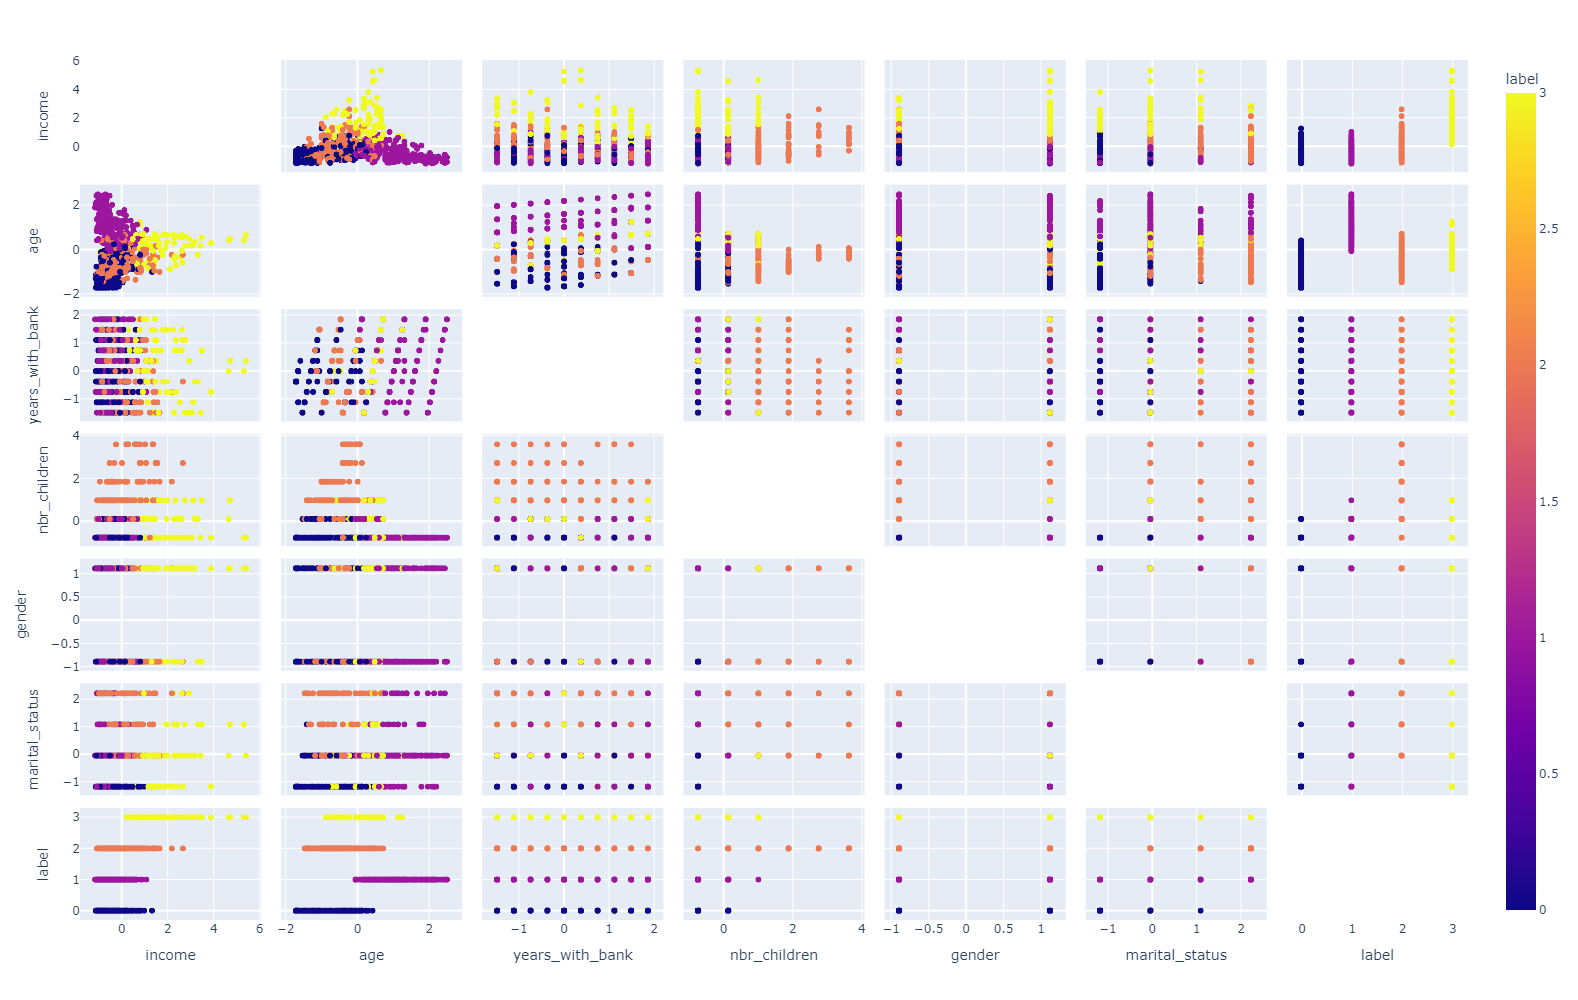

In [219]:
features = df_clusters.columns.values

fig = px.scatter_matrix(
    df_clusters,
    dimensions=features,
    color="label",
    height=1000
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [350]:
df_labels = df_clusters.groupby('label')[['income', 'age', 'nbr_children', 'marital_status']].mean()

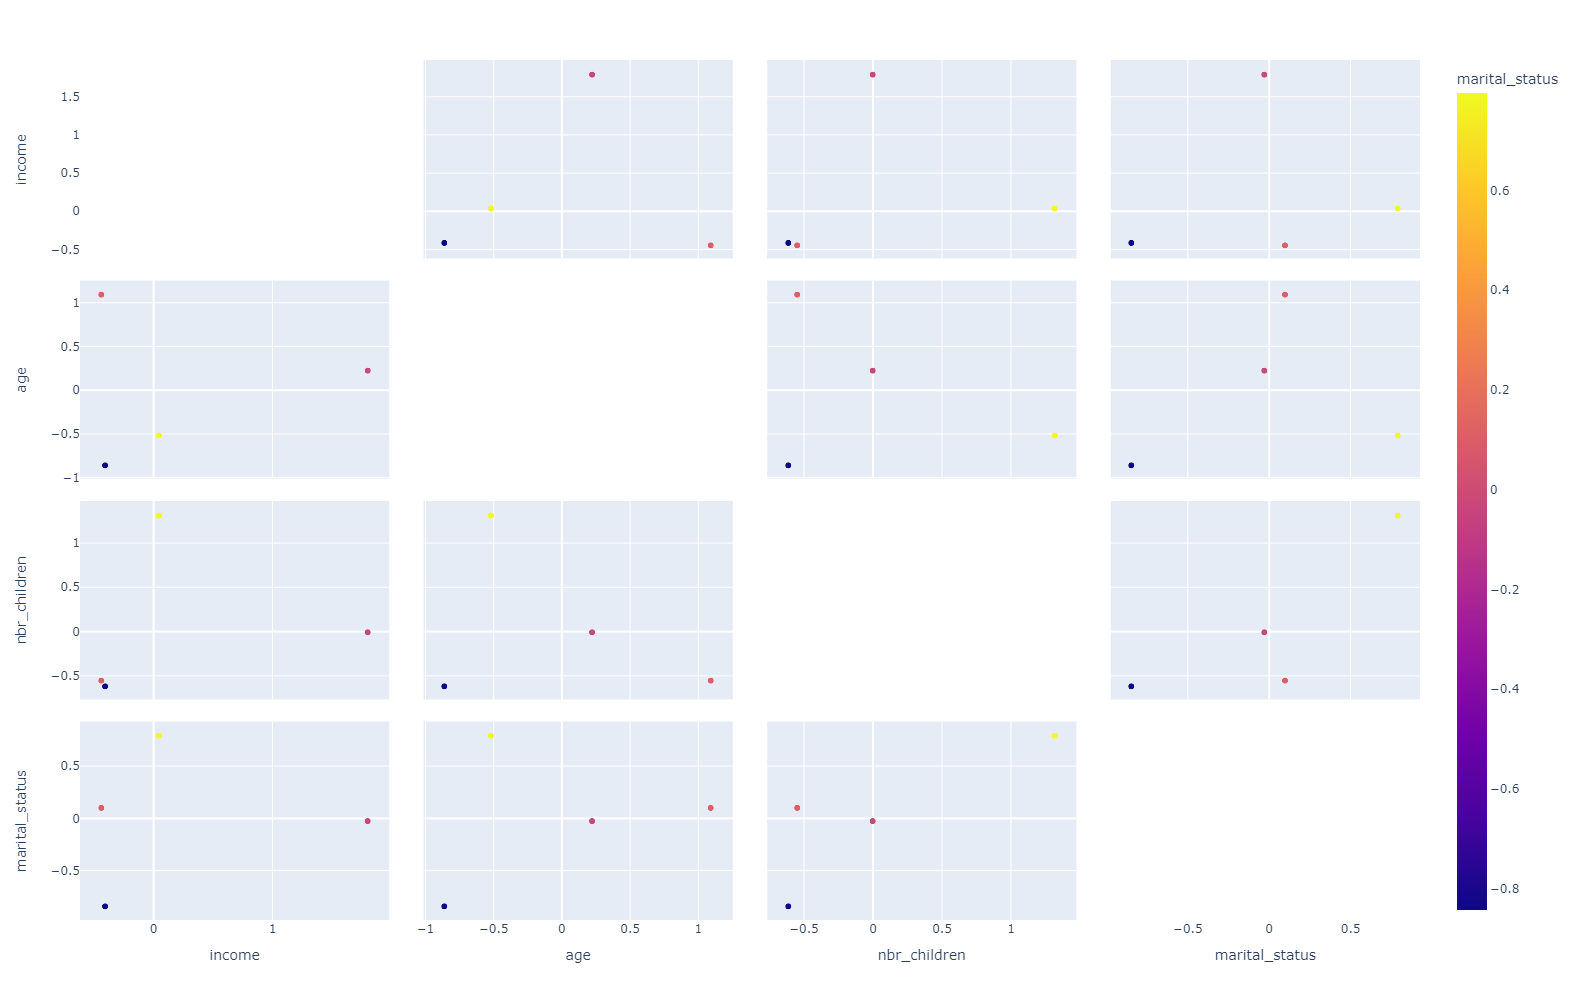

In [353]:
features = df_labels.columns.values

fig = px.scatter_matrix(
    df_labels,
    dimensions=features,
    color="marital_status",
    height=1000
)
fig.update_traces(diagonal_visible=False)
fig.show()

# Question 3
### Use PCA

In [55]:
clusters

,income,age,years_with_bank,nbr_children,gender,marital_status,label
0,-0.007909,-0.047338,0.382523,0.150097,1.127443,-0.024611,1
1,-0.903965,1.431981,-1.106028,-0.722087,1.127443,-0.024611,1
2,-0.356429,-0.520720,1.498936,-0.722087,-0.886963,-1.158471,0
3,0.978600,0.426044,-0.361752,-0.722087,-0.886963,-1.158471,0
4,0.835836,0.721908,1.871073,1.022281,-0.886963,2.243109,2
...,...,...,...,...,...,...,...
640,-0.528488,-0.639066,0.754660,0.150097,-0.886963,2.243109,2
641,0.002956,0.544389,0.754660,0.150097,1.127443,-0.024611,1
642,1.603569,0.189353,-1.478165,1.022281,1.127443,-0.024611,3
643,-0.514505,-0.579893,1.126798,-0.722087,-0.886963,-0.024611,0


In [59]:
df_pca = clusters.drop('label', axis=1)

### PCA

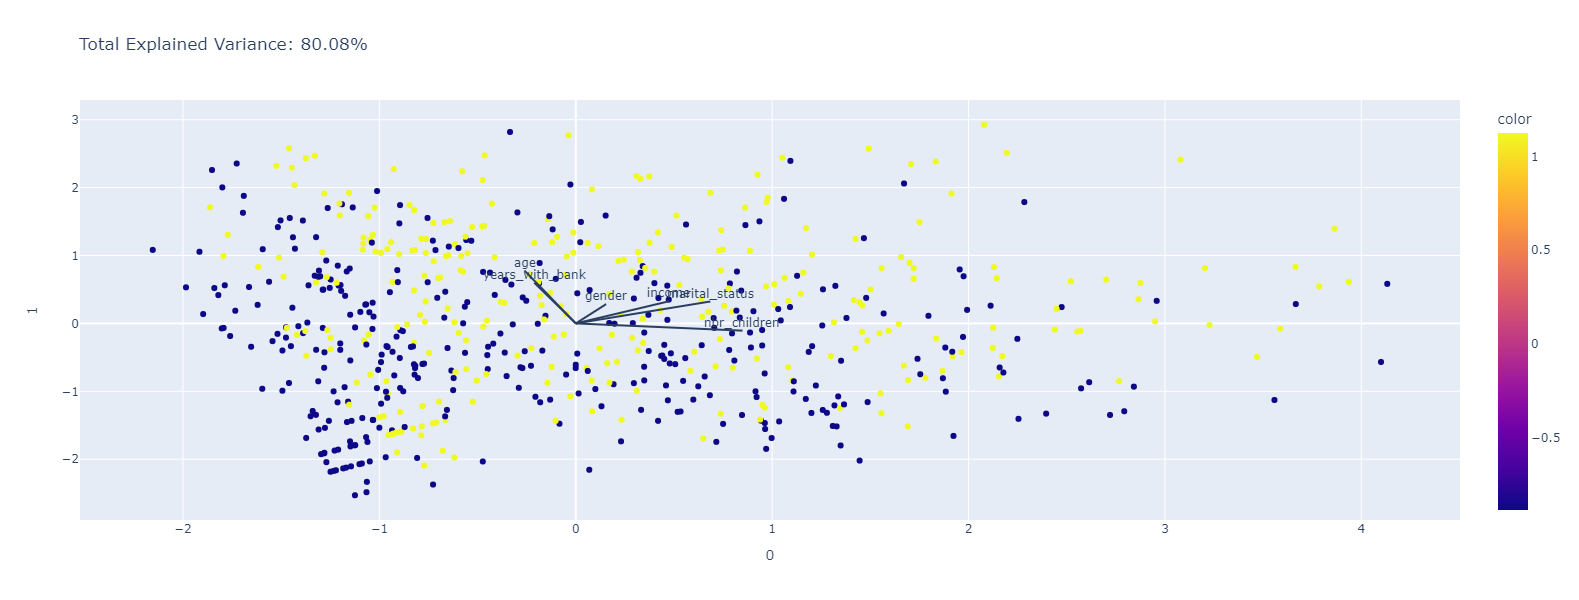

In [381]:
features = df_standard.columns.values

pca = PCA(n_components=4)
components = pca.fit_transform(df_standard)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(components, 
                 x=0, 
                 y=1,
                 color=df_standard.gender,
                title=f'Total Explained Variance: {total_var:.2f}%',
                width=1300,
                height=600)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [205]:
clusters

,income,age,years_with_bank,nbr_children,gender,marital_status,label
0,-0.007909,-0.047338,0.382523,0.150097,1.127443,-0.024611,1
1,-0.903965,1.431981,-1.106028,-0.722087,1.127443,-0.024611,1
2,-0.356429,-0.520720,1.498936,-0.722087,-0.886963,-1.158471,0
3,0.978600,0.426044,-0.361752,-0.722087,-0.886963,-1.158471,0
4,0.835836,0.721908,1.871073,1.022281,-0.886963,2.243109,2
...,...,...,...,...,...,...,...
640,-0.528488,-0.639066,0.754660,0.150097,-0.886963,2.243109,2
641,0.002956,0.544389,0.754660,0.150097,1.127443,-0.024611,1
642,1.603569,0.189353,-1.478165,1.022281,1.127443,-0.024611,3
643,-0.514505,-0.579893,1.126798,-0.722087,-0.886963,-0.024611,0


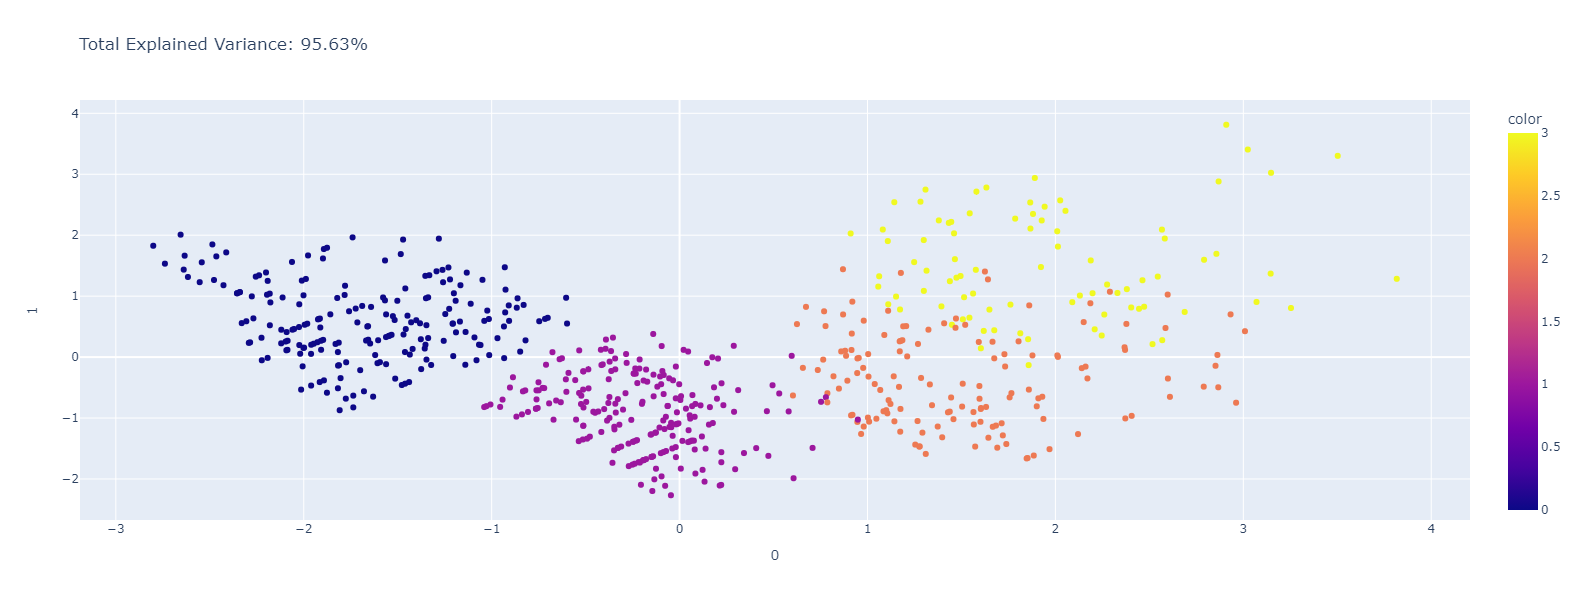

In [344]:
pca = PCA(n_components=4)
components = pca.fit_transform(clusters)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(components, 
                 x=0, 
                 y=1,
                 color=clusters.label,
                title=f'Total Explained Variance: {total_var:.2f}%',
                width=1300,
                height=600)
fig.show()

In [164]:
components

array([[ 0.17037435,  0.43018747,  0.78931388],
       [-0.82435525,  0.48541062,  0.19951818],
       [-1.51884966, -0.15382557, -0.15808112],
       ...,
       [ 1.64451198, -0.0098783 ,  1.45938377],
       [-0.88043458, -0.11325418, -0.68495996],
       [-0.96791971, -1.97077957,  0.22713695]])

C:\Users\Sunny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



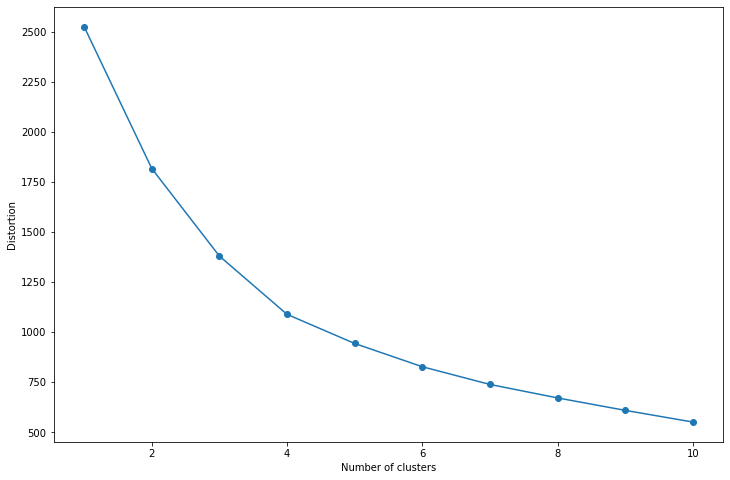

In [165]:
# elbow rule
plt.rcParams["figure.figsize"] = (12,8)
plot_distortion(components,max_clusters=10)

In [95]:
components

array([[ 0.17037435,  0.43018747,  0.78931388],
       [-0.82435525,  0.48541062,  0.19951818],
       [-1.51884966, -0.15382557, -0.15808112],
       ...,
       [ 1.64451198, -0.0098783 ,  1.45938377],
       [-0.88043458, -0.11325418, -0.68495996],
       [-0.96791971, -1.97077957,  0.22713695]])

### KMeans after PCA

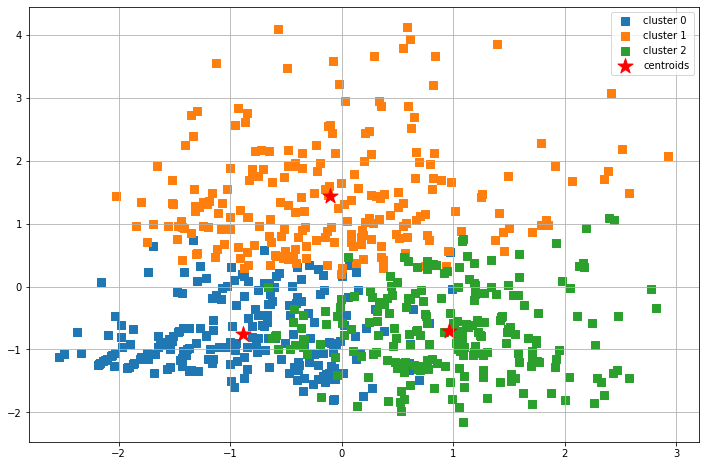

In [382]:
# Cluster using standard data

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

y_km = km.fit_predict(components)

plot_clusters(components, y_km, plt_cluster_centers= True)